### 실습 목표
- pandas,matplotlib 사용하기
- 각 구별 CCTV현황 살펴보기, 인구대비 CCTV비율이 높은/낮은 지역 알아보기
- 각 구별 CCTV 예측치 확인하고 그로 인하여 CCTV가 과하거나 부족한 지역을 시각화 함

#### 1. CSV 파일 읽기 - 서울시 구별  CCTV 현황

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.xls', encoding = "utf-8")

In [31]:
CCTV_Seoul.head(8)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354


In [32]:
#컬럼 이름 바꾸기(딕셔너리 형태)
CCTV_Seoul=CCTV_Seoul.rename(columns={"기관명":"구"})

In [33]:
CCTV_Seoul

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


####  2. 엑셀파일 읽기 - 서울시 인구현황

In [34]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [35]:
# 원하는 행, 열 설정해서 읽기
# header : 읽고 싶은 row index(0부터 시작)
# usecols : 읽고 싶은 column 선택

In [36]:
pop_Seoul = pd.read_excel("population_in_Seoul.xls", header=2, usecols = "B,D,G,J,N")

In [37]:
pop_Seoul.columns=['구','인구수','한국인수','외국인수','65세이상고령자수']

In [38]:
pop_Seoul.head()

,구,인구수,한국인수,외국인수,65세이상고령자수
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


###  결측치 확인

In [39]:
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   구          26 non-null     object 
 1   인구수        26 non-null     float64
 2   한국인수       26 non-null     float64
 3   외국인수       26 non-null     float64
 4   65세이상고령자수  26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [40]:
pop_Seoul

,구,인구수,한국인수,외국인수,65세이상고령자수
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


In [41]:
pop_Seoul[pop_Seoul['인구수'].isnull()]

,구,인구수,한국인수,외국인수,65세이상고령자수
26,NaN,NaN,NaN,NaN,NaN


In [42]:
# 결측치 삭제(무조건 삭제하는건 좋지 않음)
pop_Seoul.drop(26, inplace = True)

###  4. 데이터 병합

In [43]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul, on = "구")
data_result

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자수
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0
5,광진구,707,573,78,53,174,372164.0,357211.0,14953.0,42214.0
6,구로구,1561,1142,173,246,323,447874.0,416487.0,31387.0,56833.0
7,금천구,1015,674,51,269,354,255082.0,236353.0,18729.0,32970.0
8,노원구,1265,542,57,451,516,569384.0,565565.0,3819.0,71941.0
9,도봉구,485,238,159,42,386,348646.0,346629.0,2017.0,51312.0


### 5. 인구수 대비 CCTV 비율이 높은 지역/낮은 지역 알아보기
특성공학 : 컬럼끼리 연산을 통해 의미있는 컬럼을 만드는 작업

In [50]:
data_result['인구대비 CCTV 비율'] = data_result["소계"]/data_result['인구수']*100

In [52]:
data_result.sort_values(by='인구대비 CCTV 비율',ascending=False)

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자수,인구대비 CCTV 비율
20,용산구,1624,1368,218,112,398,244203.0,229456.0,14747.0,36231.0,0.665020
22,종로구,1002,464,314,211,630,162820.0,153589.0,9231.0,25425.0,0.615404
23,중구,671,413,190,72,348,133240.0,124312.0,8928.0,20764.0,0.503603
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.487292
14,서초구,1930,1406,157,336,398,450310.0,445994.0,4316.0,51733.0,0.428594
18,양천구,2034,1843,142,30,467,479978.0,475949.0,4029.0,52975.0,0.423769
7,금천구,1015,674,51,269,354,255082.0,236353.0,18729.0,32970.0,0.397911
21,은평구,1873,1138,224,278,468,494388.0,489943.0,4445.0,72334.0,0.378852
10,동대문구,1294,1070,23,198,579,369496.0,354079.0,15417.0,54173.0,0.350207
6,구로구,1561,1142,173,246,323,447874.0,416487.0,31387.0,56833.0,0.348536


### 6. 각 구별 CCTV 예측 값을 만들어보자.
##### -상관관계, 상관계수를 확인해서 CCTV 설치 숫자와 관련된 컬럼을 알아보자.

In [53]:
# 구 컬럼을 인덱스로 설정
data_result.set_index('구',inplace=True)

In [54]:
data_result.head()

,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자수,인구대비 CCTV 비율
구,,,,,,,,,,
강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.487292
강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.170552
강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0,0.226535
강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,0.146413
관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0,0.284673


In [56]:
# 피어슨 상관계수
data_result.corr()['소계']

소계              1.000000
2013년도 이전       0.862756
2014년           0.450062
2015년           0.624402
2016년           0.593398
인구수             0.306342
한국인수            0.304287
외국인수           -0.023786
65세이상고령자수       0.255196
인구대비 CCTV 비율    0.575784
Name: 소계, dtype: float64

- 13,14,15,16,인구대비 CCTV 비율은 소계를 계산하거나 소계를 활용한 컬럼이므로학습에 사용하기에는 부적합 함
- 외국인 수는 0에 가까운 약한 상관관계를 가지므로 부적합 함
- 인구수, 한국인수, 64세이상 고령자수를 학습에 사용하자

머신러닝 모델을 이용해 학습을 해보자

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression() # 머신러닝 모델 객체 생성

In [61]:
X = data_result[["인구수","한국인수","65세이상고령자수"]]
X

,인구수,한국인수,65세이상고령자수
구,,,
강남구,570500.0,565550.0,63167.0
강동구,453233.0,449019.0,54622.0
강북구,330192.0,326686.0,54813.0
강서구,603772.0,597248.0,72548.0
관악구,525515.0,507203.0,68082.0
광진구,372164.0,357211.0,42214.0
구로구,447874.0,416487.0,56833.0
금천구,255082.0,236353.0,32970.0
노원구,569384.0,565565.0,71941.0


In [63]:
Y = data_result['소계']
Y

구
강남구     2780
강동구      773
강북구      748
강서구      884
관악구     1496
광진구      707
구로구     1561
금천구     1015
노원구     1265
도봉구      485
동대문구    1294
동작구     1091
마포구      574
서대문구     962
서초구     1930
성동구     1062
성북구     1464
송파구      618
양천구     2034
영등포구     904
용산구     1624
은평구     1873
종로구     1002
중구       671
중랑구      660
Name: 소계, dtype: int64

In [64]:
# 학습
model.fit(X,Y)

LinearRegression()

In [70]:
# 예측
# [ ]사이에는 예측할 값을 넣으면 됨
pre = model.predict([[1000,1000,1000]])

In [69]:
pre

array([722.26601597])

각 구별로 CCTV 숫자를 예측하게 만들어보자.

In [71]:
CCTV_pre = model.predict(X)

In [72]:
CCTV_pre

array([1442.5032089 , 1255.71550679,  976.1746709 , 1433.85903425,
       1315.05710953, 1201.67206033, 1261.39978696, 1027.98529698,
       1358.26399258, 1047.59332788, 1087.07354252, 1162.37592509,
       1175.76263181, 1042.23718134, 1275.6726698 , 1074.97390744,
       1191.93995091, 1578.09806317, 1330.67108997, 1205.71121712,
        968.16225851, 1186.82809996,  876.08379722,  851.69179082,
       1149.49387919])

In [73]:
Y

구
강남구     2780
강동구      773
강북구      748
강서구      884
관악구     1496
광진구      707
구로구     1561
금천구     1015
노원구     1265
도봉구      485
동대문구    1294
동작구     1091
마포구      574
서대문구     962
서초구     1930
성동구     1062
성북구     1464
송파구      618
양천구     2034
영등포구     904
용산구     1624
은평구     1873
종로구     1002
중구       671
중랑구      660
Name: 소계, dtype: int64

In [74]:
# 예측값과 실제값의 차이 (오차) 구하기
error = np.abs(CCTV_pre - Y)

In [76]:
error

구
강남구     1337.496791
강동구      482.715507
강북구      228.174671
강서구      549.859034
관악구      180.942890
광진구      494.672060
구로구      299.600213
금천구       12.985297
노원구       93.263993
도봉구      562.593328
동대문구     206.926457
동작구       71.375925
마포구      601.762632
서대문구      80.237181
서초구      654.327330
성동구       12.973907
성북구      272.060049
송파구      960.098063
양천구      703.328910
영등포구     301.711217
용산구      655.837741
은평구      686.171900
종로구      125.916203
중구       180.691791
중랑구      489.493879
Name: 소계, dtype: float64

####  7. 결과 시각화

In [81]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
rc('font', family=font_name)

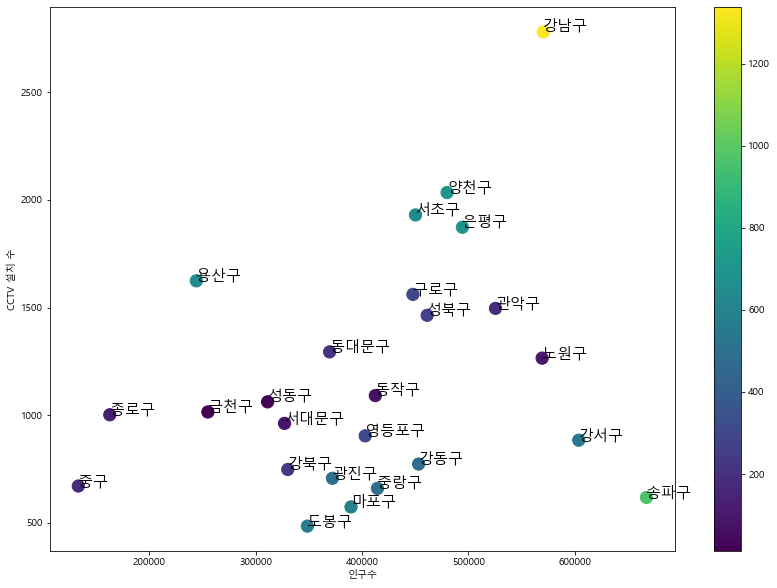

In [91]:
plt.figure(figsize=(14,10)) # 가로,세로
plt.scatter(data_result['인구수'],
           data_result['소계'],s=150,
           c=error)
for i in range(25) :
    plt.text(data_result['인구수'][i],
            data_result['소계'][i],
            data_result.index[i],fontsize=15)
plt.xlabel('인구수')
plt.ylabel('CCTV 설치 수')
plt.colorbar()
plt.savefig('result.png')
plt.show()